In [3]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from rdflimeConfig import datasets, load_dataset

In [10]:
# 0: Metacritic-Movies
# 1: Metacritic-Albums
# 2: Forbes-Companies
# 3: Mercer-Cities
# 4: AAUP-Salaries
# -> See rdflimeConfig.py
explored_dataset_idx = 3

dataset_full, dataset_entities = load_dataset(datasets[explored_dataset_idx], fixed=False)
cfg = datasets[explored_dataset_idx]

In [11]:
print(f"""
{cfg["name"]} dataset loaded.
Total samples: {len(dataset_full)}
""")

dataset_full


mercer-cities dataset loaded.
Total samples: 212



,Wikidata_URI15,id,city_name,DBpedia_URI,rating,label,DBpedia_URI15,YAGO_URI15,DBpedia_URI15_Base32
0,http://www.wikidata.org/entity/Q24639,1.0,Vancouver,http://dbpedia.org/resource/Vancouver,106.0,high,http://dbpedia.org/resource/Vancouver,http://yago-knowledge.org/resource/Vancouver,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6V...
1,http://www.wikidata.org/entity/Q72,2.0,Zurich,http://dbpedia.org/resource/Zurich,106.0,high,http://dbpedia.org/resource/Zürich,NaN,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6W...
2,http://www.wikidata.org/entity/Q1741,3.0,Vienna,http://dbpedia.org/resource/Vienna,106.0,high,http://dbpedia.org/resource/Vienna,http://yago-knowledge.org/resource/Vienna,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6V...
3,http://www.wikidata.org/entity/Q70,4.0,Bern,http://dbpedia.org/resource/Bern,106.0,high,http://dbpedia.org/resource/Bern,http://yago-knowledge.org/resource/Bern,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6Q...
4,http://www.wikidata.org/entity/Q3130,5.0,Sydney,http://dbpedia.org/resource/Sydney,105.5,high,http://dbpedia.org/resource/Sydney,http://yago-knowledge.org/resource/Sydney,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6U...
...,...,...,...,...,...,...,...,...,...
207,http://www.wikidata.org/entity/Q3832,208.0,Bangui,http://dbpedia.org/resource/Bangui,33.5,low,http://dbpedia.org/resource/Bangui,http://yago-knowledge.org/resource/Bangui,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6Q...
208,http://www.wikidata.org/entity/Q1530,209.0,Baghdad,http://dbpedia.org/resource/Baghdad,33.0,low,http://dbpedia.org/resource/Baghdad,http://yago-knowledge.org/resource/Baghdad,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6Q...
209,http://www.wikidata.org/entity/Q1963,210.0,Khartoum,http://dbpedia.org/resource/Khartoum,33.0,low,http://dbpedia.org/resource/Khartoum,http://yago-knowledge.org/resource/Khartoum,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6S...
210,http://www.wikidata.org/entity/Q223920,211.0,Pointe Noire,http://dbpedia.org/resource/Pointe_Noire,30.5,low,http://dbpedia.org/resource/Pointe-Noire,http://yago-knowledge.org/resource/Pointe-Noire,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6U...


In [12]:
# Best / worst entries?
rating_col = cfg["columns"]["rating"]
display(dataset_full.sort_values(by="rating", ascending=False).head(3))
display(dataset_full.sort_values(by="rating", ascending=False).tail(3))

,Wikidata_URI15,id,city_name,DBpedia_URI,rating,label,DBpedia_URI15,YAGO_URI15,DBpedia_URI15_Base32
0,http://www.wikidata.org/entity/Q24639,1.0,Vancouver,http://dbpedia.org/resource/Vancouver,106.0,high,http://dbpedia.org/resource/Vancouver,http://yago-knowledge.org/resource/Vancouver,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6V...
3,http://www.wikidata.org/entity/Q70,4.0,Bern,http://dbpedia.org/resource/Bern,106.0,high,http://dbpedia.org/resource/Bern,http://yago-knowledge.org/resource/Bern,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6Q...
1,http://www.wikidata.org/entity/Q72,2.0,Zurich,http://dbpedia.org/resource/Zurich,106.0,high,http://dbpedia.org/resource/Zürich,NaN,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6W...


,Wikidata_URI15,id,city_name,DBpedia_URI,rating,label,DBpedia_URI15,YAGO_URI15,DBpedia_URI15_Base32
209,http://www.wikidata.org/entity/Q1963,210.0,Khartoum,http://dbpedia.org/resource/Khartoum,33.0,low,http://dbpedia.org/resource/Khartoum,http://yago-knowledge.org/resource/Khartoum,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6S...
210,http://www.wikidata.org/entity/Q223920,211.0,Pointe Noire,http://dbpedia.org/resource/Pointe_Noire,30.5,low,http://dbpedia.org/resource/Pointe-Noire,http://yago-knowledge.org/resource/Pointe-Noire,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6U...
211,http://www.wikidata.org/entity/Q3844,212.0,Brazzaville,http://dbpedia.org/resource/Brazzaville,23.0,low,http://dbpedia.org/resource/Brazzaville,http://yago-knowledge.org/resource/Brazzaville,NB2HI4B2F4XWIYTQMVSGSYJON5ZGOL3SMVZW65LSMNSS6Q...


high 67
medium 106
low 39


<AxesSubplot:>

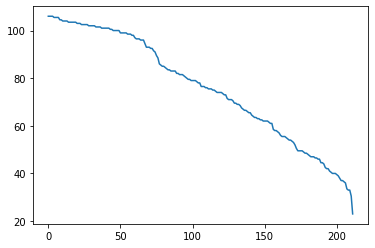

In [13]:
label_col = cfg["columns"]["label"]

# Check number of label occurrences (is the dataset balanced?)
for label in dataset_full[label_col].unique():
    print(label, len(dataset_full[dataset_full.label == label]))

dataset_full[rating_col].plot()

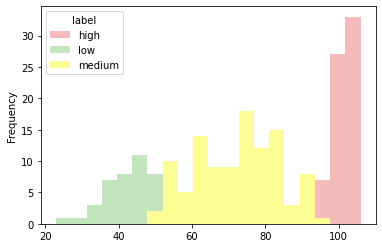

In [14]:
# Check rating distribution using histogram
_ratingHist = dataset_full.copy()
_ratingHist.pivot(columns=label_col, values=rating_col).plot.hist(color=["#F4BBBA", "#C3E5BD", "#fdfd96"], bins=20)
plt.show()

# Findings (metacritic-movies):
# All movies with rating <= 40 marked bad
# All movies with rating >= 60 marked good
# No movies with rating 40-60 contained


In [15]:
# Check movies without rating
dataset_full[pd.isna(dataset_full[rating_col])]

# Findings:
# None contained in updated dataset

,Wikidata_URI15,id,Company,Industry,Country,rating,Sales,Profits,Assets,Rank,DBpedia_URI,label,DBpedia_URI15,YAGO_URI15,DBpedia_URI15_Base32
